In [4]:
from scipy.optimize import curve_fit
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
class Car:
    "sdfsf"

T=5000
l=500 #總長
P=[] #所有時間所有狀態


t=[] #時間(長度和P一樣)



p2=1 #進車機率
def f(l):
    return l[0]
#排序用的function 可不管
def prob(x):
    a=random.randint(1,10)
    if a<=x*10:
        return True
    else:
        return False
    # x的機率是true 1-x的機率是False
def ini(n,V_max):   #初始化的程式
    
    S=[] #儲存某個時間點個個車子的狀態
    rad_x=random.sample(range(l),n)
    for i in range(n):
        x=Car()
        x.pos=rad_x[i]
        x.v=random.randint(0,V_max)
        
        S.append([x.pos,x.v])
    S.sort(key=f)

    return S
 
def avg(x): #算平均用的
    
    for i in range(len(x)):
        if i==0:
            pass
        else:
            x[i]+=x[i-1]
    return x[len(x)-1]/len(x)
    



In [20]:

rho=[] #各個時刻的密度
t_rho=[] #用來化密度-t圖的
avgV=[] #個個時刻的平均速度
def traffic(n,V_max,p):
    
    #n是車子數量 V_max速度上限 p減速機率
    S=ini(n,V_max)
    V=[] #計算平均速度用的

    for j in range(T):
        rho.append(len(S)/l)
        t_rho.append(j)
        V1=[]
        #每個時段內發生的事
        for i in range(len(S)):
            x=len(S)-1
            t.append(j) 
            P.append(S[x-i][0])
        #每台車的狀況
            if i>0  :
                   #(1)加速不會撞到的話就+速
                if S[x-i][1]+1 <(S[x-i+1][0]-S[x-i][0]) and S[x-i][1]<V_max :
                    S[x-i][1]+=1
                    if prob(p)==True :
                        S[x-i][1]-=1
                         #(3)p機率減速1單位
                if S[x-i][1]>=(S[x-i+1][0]-S[x-i][0])  :
                    #(2)速度會撞上前車的話就減速至跟距離一樣的大小避免相撞
                    S[x-i][1]=S[x-i+1][0]-S[x-i][0]-1
                    if S[x-i][1]<0:
                            #debug用的
                        print(S[x-i+1][0],S[x-i][0],S[x-i][1],j,i)
                        break
            if i==0 and S[x-i][1]<V_max:
                S[x-i][1]+=1
                if prob(p)==True :
                    S[x-i][1]-=1
                
           
            
           
        for k in range(len(S)):
            S[k][0]+=S[k][1]  #(4)更新車子的位置
            if S[k][1]>V_max:
                print(87)
                break
            V.append(S[k][1]) #j時刻所有車的速度都丟進來
            V1.append(S[k][1])
        avgV.append(avg(V1)) #j時刻的平均速度
      
            
        if len(S)!=0 and S[len(S)-1][0]>l:
            S.remove(S[len(S)-1])
           
            #(5)超出去的就刪掉
        if len(S)!=0:
            if prob(p2) and S[0][0]!=0 :
                S.insert(0,[0,random.randint(0,V_max)])
               
        #(6)入口進車的判斷  
    
    avg_V=avg(V) #每個n對應到的平均速度
    
    return avg_V 
P=[]
t=[]
traffic(500,5,0.7)


820 1295


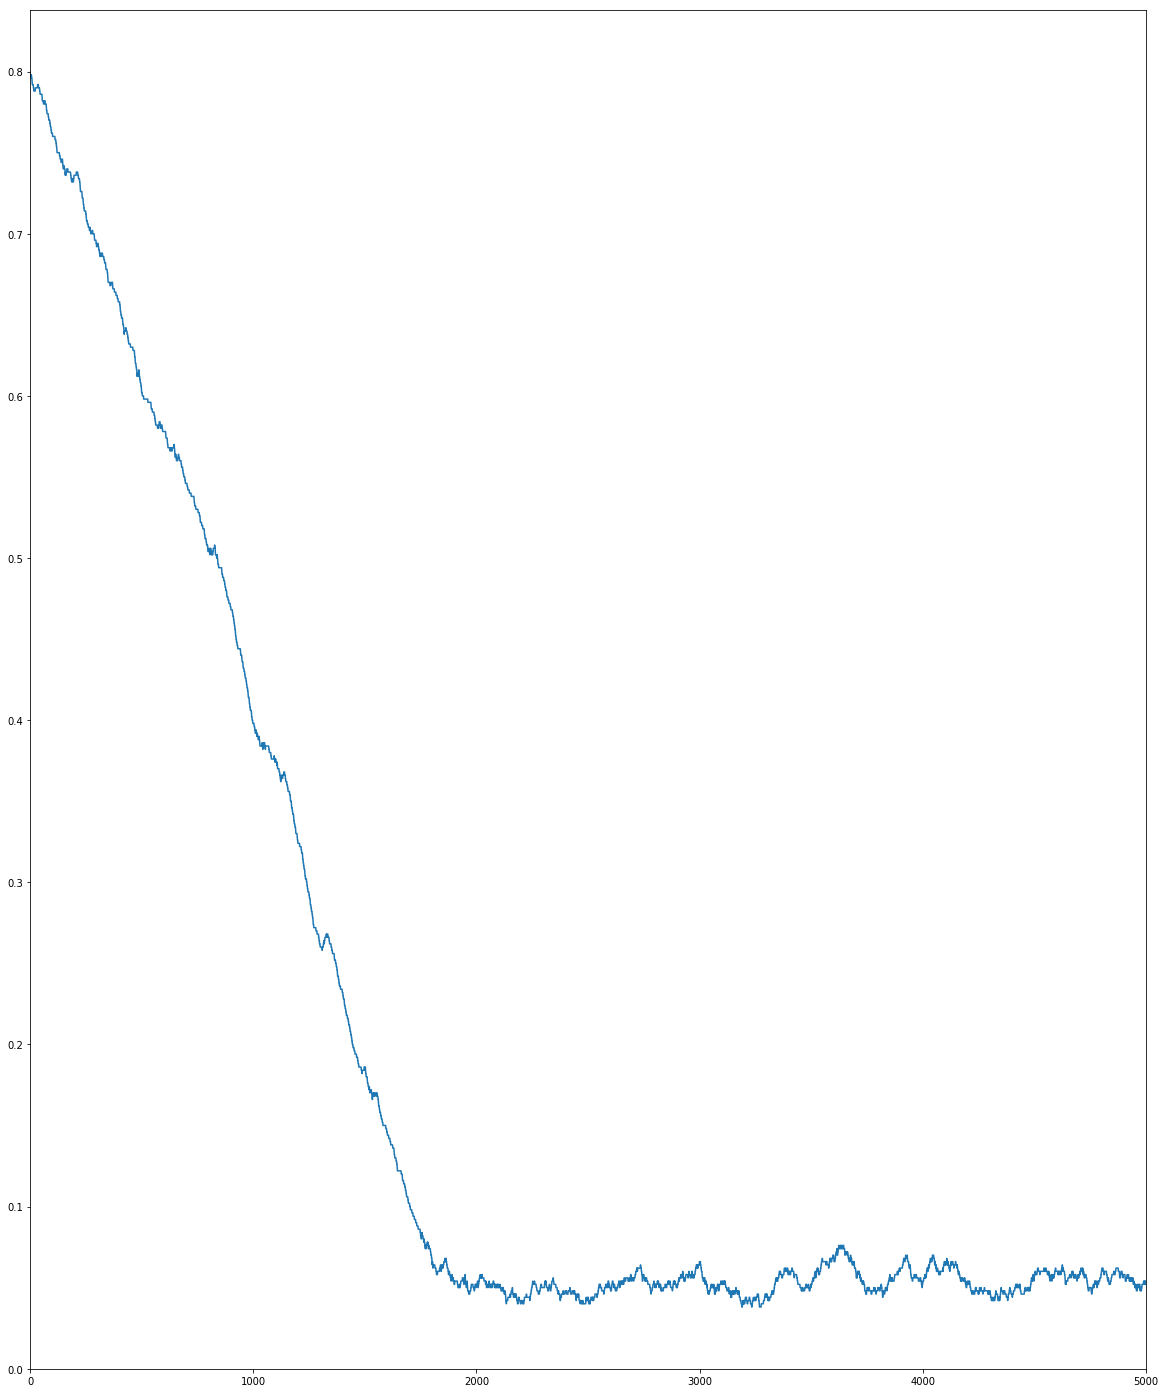

In [150]:
plt.figure(figsize=(20,25))
plt.xlim(0,5000)
#plt.ylim(0,2)
#plt.plot(t_rho,avgV)
plt.plot(t_rho,rho)
#plt.scatter(t,P) #X 時間    Y 位置

In [ ]:
#Vbar 和 ro
Vbar1=[] #蒐集各個n的平均速度
ro1=[] #密度

for i in range(1,500,1):
    Vbar1.append(traffic(i,5,0.1))
    ro1.append(i/500)
    print(i)


#Vbar2=[] #蒐集各個n的平均速度
#ro2=[] #密度

#for i in range(1,500,1):
 #   Vbar2.append(traffic(i,5,0.5))
  #  ro2.append(i/500)
   # print(i)


#Vbar3=[] #蒐集各個n的平均速度
#ro3=[] #密度

#for i in range(1,500,1):
 #   Vbar3.append(traffic(i,5,0.7))
  #  ro3.append(i/500)
   # print(i)
#plt.plot(ro3,Vbar3)

Vbar4=[] #蒐集各個n的平均速度
ro4=[] #密度

for i in range(1,500,1):
    Vbar4.append(traffic(i,5,0.9))
    ro4.append(i/500)
    print(i)
#plt.scatter(ro1,Vbar1)
#plt.scatter(ro2,Vbar2)
#plt.scatter(ro3,Vbar3)
plt.scatter(ro4,Vbar4)

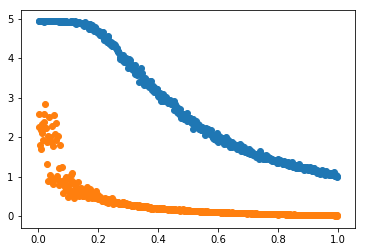

In [82]:

plt.scatter(ro1,Vbar1)
plt.scatter(ro4,Vbar4)

In [68]:
#以下為fitting用的

def func(ro,a,b,c,d):
    return (a*(b-ro)/ro+c)+d

ad=[ro1[i] for i in range(84,499)]
ro11=np.array(ad)
V1=np.array([Vbar1[i] for i in range(84,499)])
    
#y1=[]
#for i in range(84,500):
 #   q=i/500
  #  y1.append([(1-q)/q])
   # print(i)


In [79]:
qaq,qpq=curve_fit(func,ro11,V1)

In [80]:
a=qaq[0]
b=qaq[1]
c=qaq[2]
d=qaq[3]

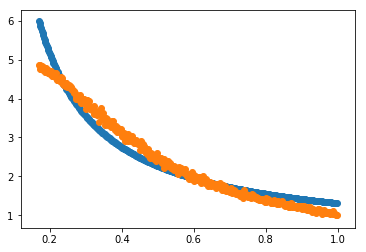

In [87]:
plt.scatter(ro11,[func(i,a,b,c,d) for i in ro11])
plt.scatter(ro11,V1)